# Superstore Analysis and Projections

Author: Prabaningrum Hendraswari Buditjahjono & Ferry M. Suhendra

### Introduction

Obtained from [Kaggle](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting), this dataset contains what is assumed to be retail data from an unnamed global superstore in a span of 4 years. This dataframe contains 18 features/columns that are self explanatory. 

Superstores are by definition retail locations that aim to be a one-stop shop and have a store area more than 80.000 square feet. In managing a superstore, a company might be faced with a lot of problems. Some were exacerbated by the growing number of competitors. A few of these issues include finding out what the customers want from the store and trying to retain existing customers. An analysis of the store's data is required to address the issues. As a result, from this dataset, we want to:

1. Determine when is the period with the most orders

2. Determine what shipping mode is mostly used

3. Determine which State/County bought the most items 

4. Determine which categories are bought most

5. Identify certain interesting patterns

6. Forecast which items will have an increase in trends in the next 3 months.

### Import Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from feature_engine.outliers import Winsorizer

import datetime
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [24]:
df = pd.read_csv('SuperstoreData.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Are the orders only from the US? if so, we can get rid of the country column.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

There are missing values in the postal code. Not a big deal, but it becomes a question on how the package gets delivered in the first place.

### Exploratory Data Analysis

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


There appears to be purchases of orders under 1$, this may be worth looking into to make sure its not an error.

In [27]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [29]:
print(df['Order Date'].min())
print(df['Order Date'].max())
print(df['Ship Date'].min())
print(df['Ship Date'].max())

2015-01-02 00:00:00
2018-12-30 00:00:00
2015-01-04 00:00:00
2019-05-01 00:00:00


There is a gap between last order & last shipping. Why? Is it the same order?

What is the average shipping time (from order to shipping)?

In [30]:
# defining plot function
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

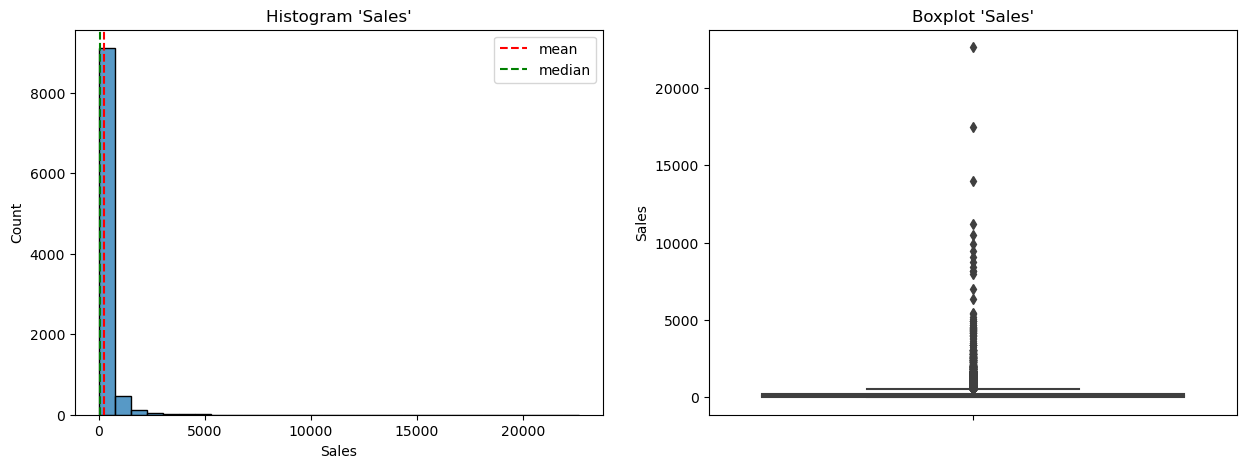

Sales Kurtosis: 304.4450883210413
Sales Skewness: 12.983482865034619
Columns 'Sales' right skewed


In [31]:
# checking data distribution of sales
plot_dist(df,'Sales')

There are outliers in the sales data. due to the low ammount of data to work with these outliers will be winsorized.


In [32]:
# Capping sales using Winsorizer
dfw = df
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3,variables=['Sales'])
winsorizer.fit(dfw)
dfw = winsorizer.transform(dfw)

            Sales
Order Date       
2018-09-30    382


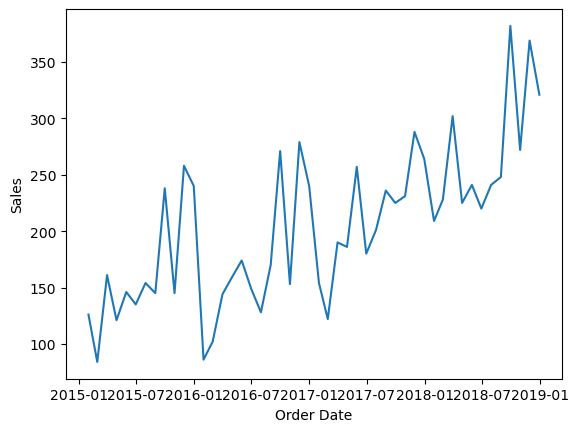

In [51]:
# Checking for month with most sales count
dfn=dfw
dfn.index=dfn['Order Date']
dfns=pd.DataFrame(dfn.groupby(pd.Grouper(freq='M'))['Sales'].count())

# Plotting counts
sns.lineplot(x='Order Date',y='Sales',data=dfns)
print(dfns[dfns['Sales']==dfns['Sales'].max()])

I it found that the highest sales count comes from the period of September 2018.

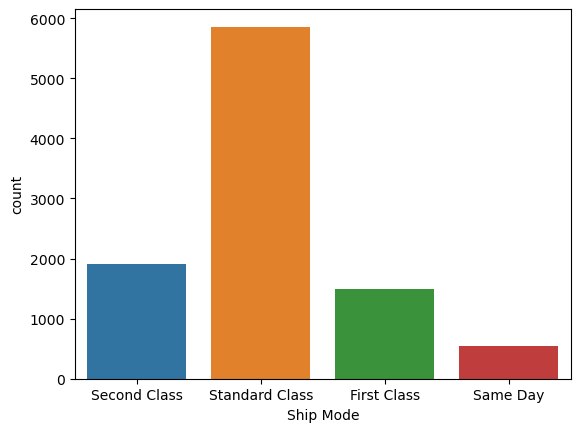

In [53]:
plt.subplot()
sns.countplot(df['Ship Mode'])
plt.show()

Most sales are delivered using the standard class delivery.

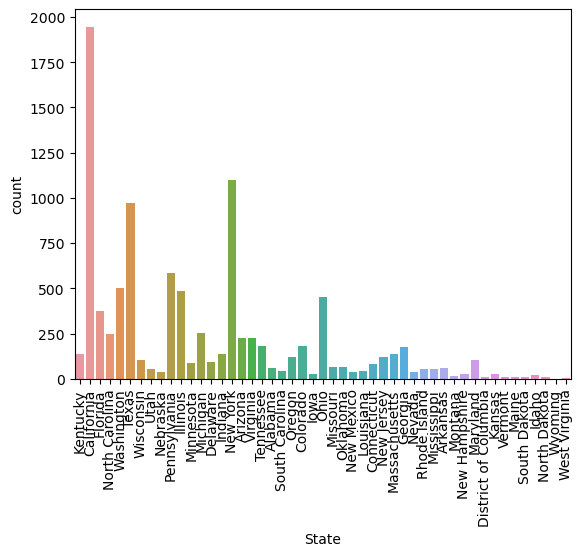

In [55]:
# checking sales count by state
plt.subplot()
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.show()

Most of the sales from the 4 years of recorded data comes from Callifornia followed by New York and Texas.

In [ ]:
# Calculating yearly total sales
dfm= dfw
dfm.index=dfm['Order Date']
dfms=pd.DataFrame(dfm.groupby(pd.Grouper(freq='Y'))['Sales'].sum())
dfms

,Sales
Order Date,
2015-12-31,334461.0951
2016-12-31,352211.5939
2017-12-31,422274.6448
2018-12-31,521986.7627


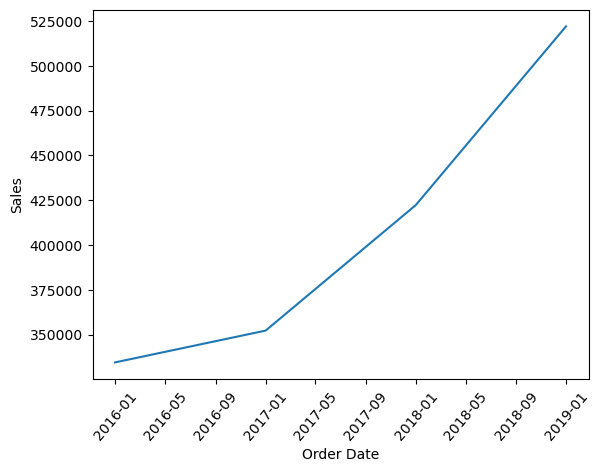

In [ ]:
# Plotting Yearly total sales.
sns.lineplot(x='Order Date',y='Sales',data=dfms)
plt.xticks(rotation=50)
plt.show()

There has been a stable increase in total yearly sales every year.

In [ ]:
# Separating data by year
dfm15=dfm[dfm['Order Date'].dt.year==2015]
dfm16=dfm[dfm['Order Date'].dt.year==2016]
dfm17=dfm[dfm['Order Date'].dt.year==2017]
dfm18=dfm[dfm['Order Date'].dt.year==2018]
# Calculating monthly total sales
dfm15=pd.DataFrame(dfm15.groupby(pd.Grouper(freq='M'))['Sales'].sum())
dfm16=pd.DataFrame(dfm16.groupby(pd.Grouper(freq='M'))['Sales'].sum())
dfm17=pd.DataFrame(dfm17.groupby(pd.Grouper(freq='M'))['Sales'].sum())
dfm18=pd.DataFrame(dfm18.groupby(pd.Grouper(freq='M'))['Sales'].sum())

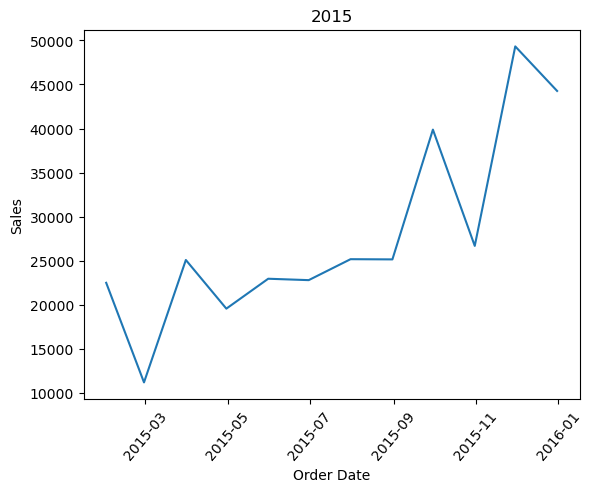

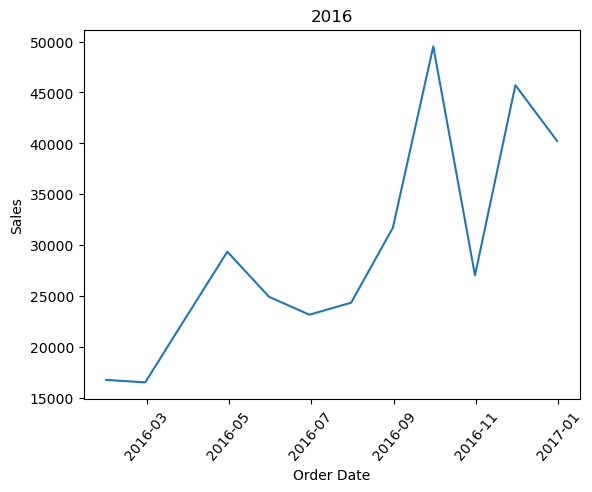

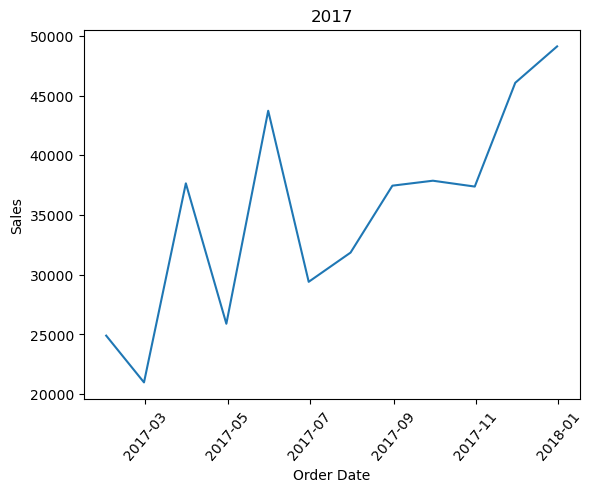

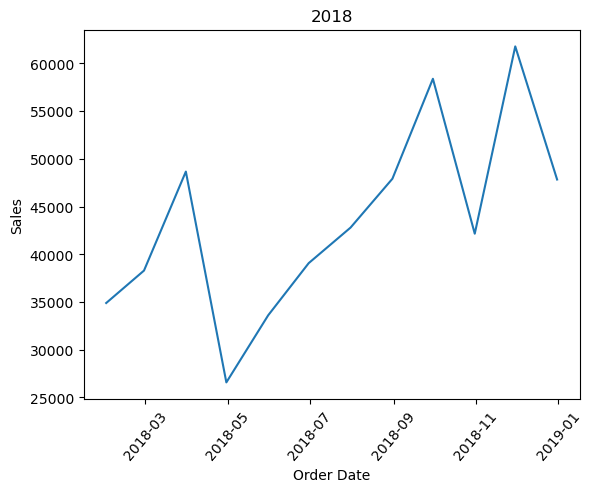

In [ ]:
# Plotting monthly total sales by year.
plt.title('2015')
sns.lineplot(x='Order Date',y='Sales',data=dfm15)
plt.xticks(rotation=50)
plt.show()
plt.title('2016')
sns.lineplot(x='Order Date',y='Sales',data=dfm16)
plt.xticks(rotation=50)
plt.show()
plt.title('2017')
sns.lineplot(x='Order Date',y='Sales',data=dfm17)
plt.xticks(rotation=50)
plt.show()
plt.title('2018')
sns.lineplot(x='Order Date',y='Sales',data=dfm18)
plt.xticks(rotation=50)
plt.show()

### Data Preprocessing